In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.tri as mtri
import matplotlib.animation

import random

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  

#  Delaunay triangulation

In [2]:
def draw_polygon(points, color='blue', background_color='white'):
    """
    Draw a filled polygon given a list of points and customize the background color.
    
    Arguments:
    - points: a list of tuples representing the (x, y) coordinates of the points
    - color: the color to fill the polygon with (default: 'blue')
    - background_color: the background color of the plot (default: 'white')
    
    Example usage:
    draw_polygon([(0, 0), (1, 1), (2, 0)], color='red', background_color='lightgray')
    """
    # Extract x and y coordinates from the list of points
    x_coordinates = [point[0] for point in points]
    y_coordinates = [point[1] for point in points]
  
    # Perform Delaunay triangulation on the points
    triang = mtri.Triangulation(x_coordinates, y_coordinates)

    # Add the first point at the end to close the polygon
    x_coordinates.append(x_coordinates[0])
    y_coordinates.append(y_coordinates[0])
    
    # Create a new figure and axes
    fig, ax = plt.subplots(facecolor=background_color)
    
    for triangle in triang.triangles:   
        # Create a Polygon object with the given coordinates and random color
        polygon = Polygon([(points[triangle[0]][0], points[triangle[0]][1]), 
                           (points[triangle[1]][0], points[triangle[1]][1]), 
                           (points[triangle[2]][0], points[triangle[2]][1])], 
                            facecolor=[random.random() for _ in range(3)])
    
        # Add the polygon to the axes
        ax.add_patch(polygon)
    
    # Plot the triangulation as a collection of triangles
    ax.triplot(triang, color='black')
    
    # Set limits and turn off axes
    ax.set_xlim(min(x_coordinates)-0.15, max(x_coordinates)+0.15)
    ax.set_ylim(min(y_coordinates)-0.15, max(y_coordinates)+0.15)
    ax.axis('off')
    
    # Display the plot
    plt.show()

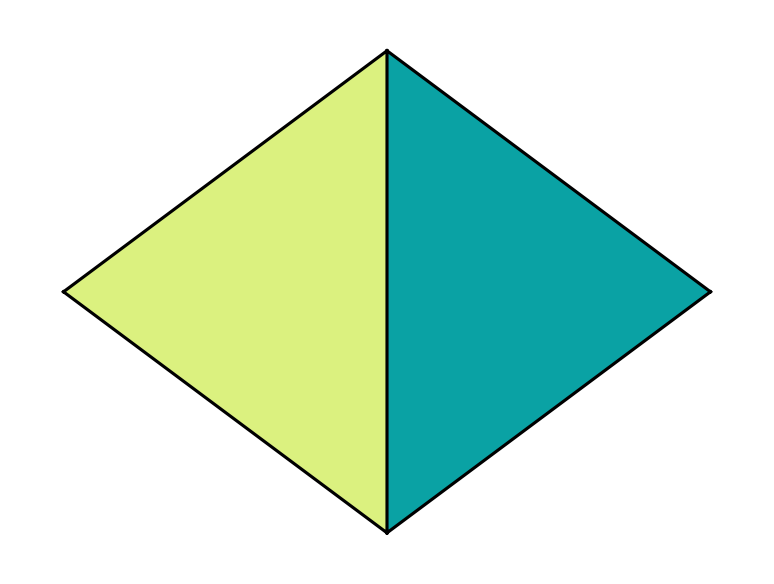

In [3]:
points1 = [(0, 0), (1, 1), (2, 0), (1, -1)]
draw_polygon(points1)

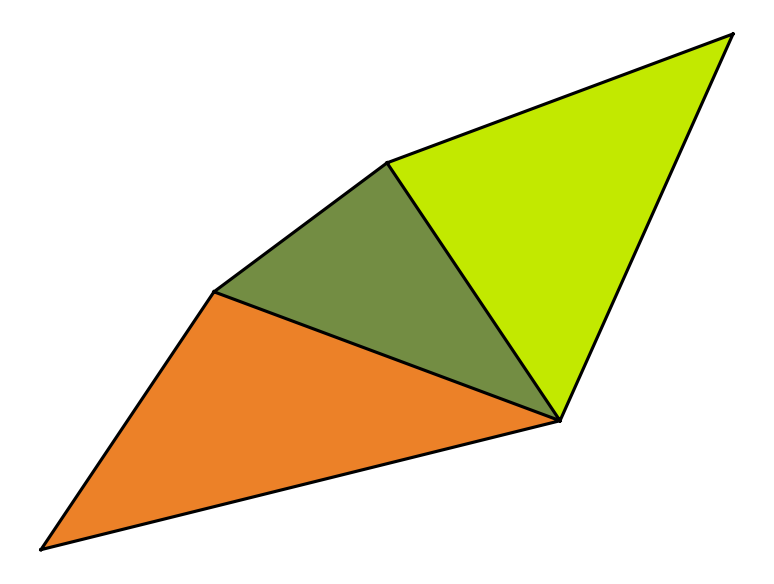

In [4]:
points2 = [(0, 0), (1, 2), (3, 1), (2, 3), (4, 4)]
draw_polygon(points2)

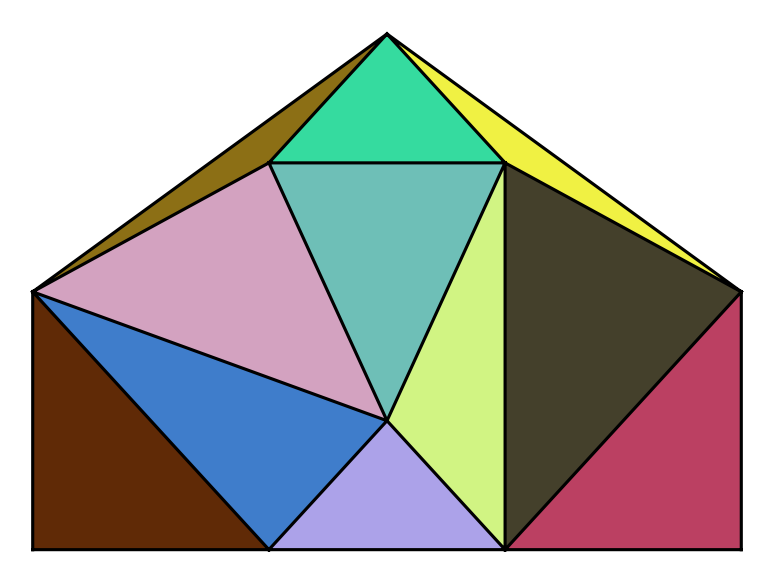

In [5]:
points3 = [(0, 0), (2, 0), (3, 1), (4, 0), (6, 0), (6, 2), (4, 3), (3, 4), (2, 3), (0, 2)]
draw_polygon(points3)

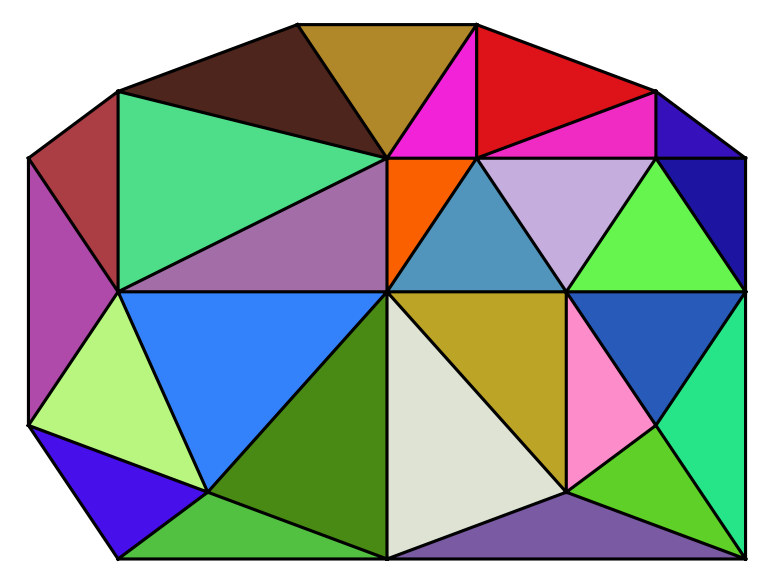

In [6]:
points4 = [(0, 0), (1, 2), (2, 0), (3, 2), (4, 0), (3, -2), (4, -4), (2, -3), (0, -4), (-2, -3), (-3, -4), (-4, -2), (-3, 0), (-4, 2), (-3, 3), (-1, 4), (0, 2), (1, 4), (3, 3), (4, 2)]
draw_polygon(points4)

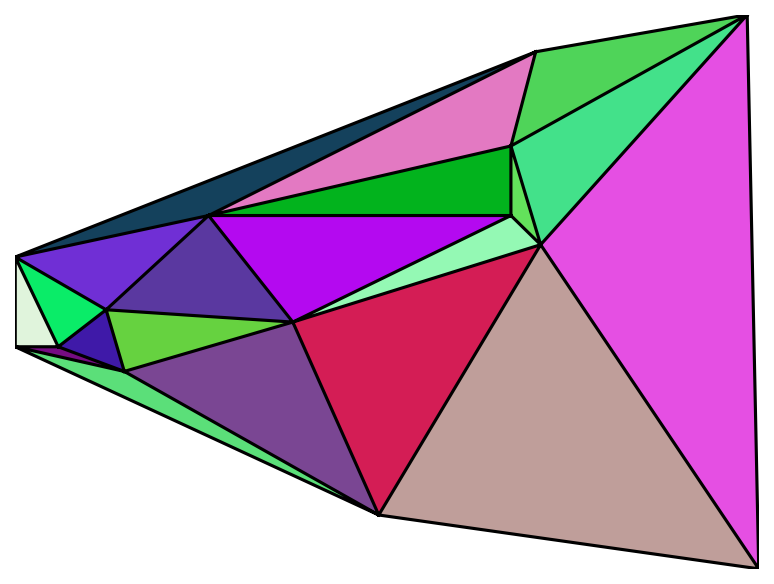

In [7]:
points5 = [(343, 392), (475, 103), (245, 151), (193, 323), (91, 279), (51, 301), (25, 301), (25, 381), (80, 334), (142, 418), (325, 418), (325, 480), (340, 564), (468, 597)]
draw_polygon(points5)

# Ear Clipping algorithm

In [8]:
def ear_clip_triangulation(points):
    """
    Perform ear clipping triangulation on a concave polygon defined by a list of points.
    Returns a list of triangles (each triangle is represented as a list of 3 points).
    """
    n = len(points)
    if n < 3:
        return []
    
    triangles = []
    
    for i in range(n):
        prev_index = (i - 1) % n
        curr_index = i
        next_index = (i + 1) % n
        
        prev_point = points[prev_index]
        curr_point = points[curr_index]
        next_point = points[next_index]
        
        if is_ear(prev_point, curr_point, next_point, points):
            triangles.append([prev_point, curr_point, next_point])
            del points[curr_index]
            return triangles + ear_clip_triangulation(points)
    
    return triangles


def is_ear(prev_point, curr_point, next_point, points):
    """
    Check if a vertex is an ear in a given polygon.
    """
    triangle = [prev_point, curr_point, next_point]
    
    for point in points:
        if point not in triangle and is_point_inside_triangle(point, triangle):
            return False
    
    return True

def is_point_inside_triangle(point, triangle):
    """
    Check if a point is inside a given triangle using barycentric coordinates.
    """
    p0, p1, p2 = triangle
    
    d = (p1[1] - p2[1]) * (p0[0] - p2[0]) + (p2[0] - p1[0]) * (p0[1] - p2[1])
    a = ((p1[1] - p2[1]) * (point[0] - p2[0]) + (p2[0] - p1[0]) * (point[1] - p2[1])) / d
    b = ((p2[1] - p0[1]) * (point[0] - p2[0]) + (p0[0] - p2[0]) * (point[1] - p2[1])) / d
    c = 1 - a - b
    
    return 0 <= a <= 1 and 0 <= b <= 1 and 0 <= c <= 1

In [9]:
def draw_polygon(points, color='blue', background_color='white'):
    """
    Draw a filled concave polygon given a list of points and customize the background color.
    The polygon is divided into triangles using the Ear Clipping algorithm.
    
    Arguments:
    - points: a list of tuples representing the (x, y) coordinates of the points
    - color: the color to fill the polygon with (default: 'blue')
    - background_color: the background color of the plot (default: 'white')
    
    Example usage:
    draw_polygon([(0, 0), (1, 2), (3, 1), (2, 3), (4, 4)], color='red', background_color='lightgray')
    """
    # Extract x and y coordinates from the list of points
    x_coordinates = [point[0] for point in points]
    y_coordinates = [point[1] for point in points]
    
    # Create a new figure and axes
    fig, ax = plt.subplots(facecolor=background_color)
    
    # Create a Polygon object with the given coordinates and color
    polygon = Polygon(points, facecolor=color)
    
    # Add the polygon to the axes
    ax.add_patch(polygon)
    
    # Perform ear clipping triangulation
    triangles = ear_clip_triangulation(points)
    
    # Plot the triangles
    for triangle in triangles:
        ax.add_patch(Polygon(triangle, facecolor=[random.random() for _ in range(3)], edgecolor='black'))
    
    # Set limits and turn off axes
    ax.set_xlim(min(x_coordinates)-0.15, max(x_coordinates)+0.15)
    ax.set_ylim(min(y_coordinates)-0.15, max(y_coordinates)+0.15)
    ax.axis('off')
    
    # Display the plot
    plt.show()

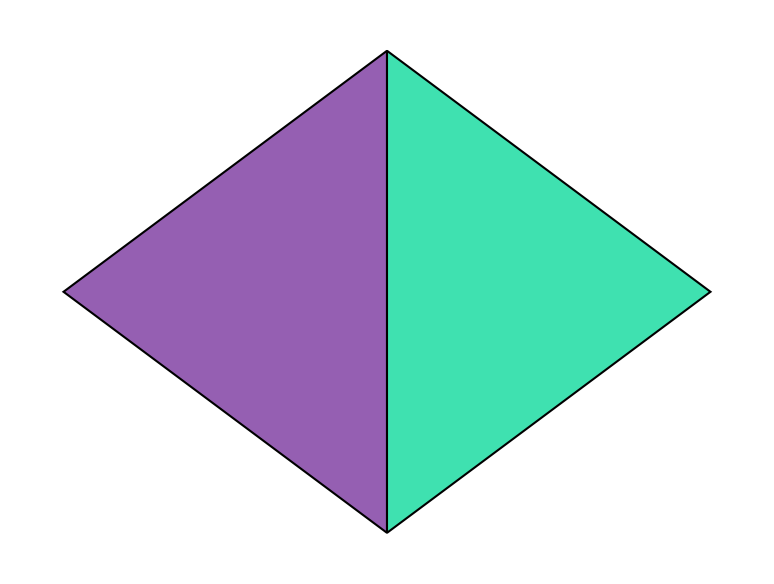

In [10]:
draw_polygon(points1)

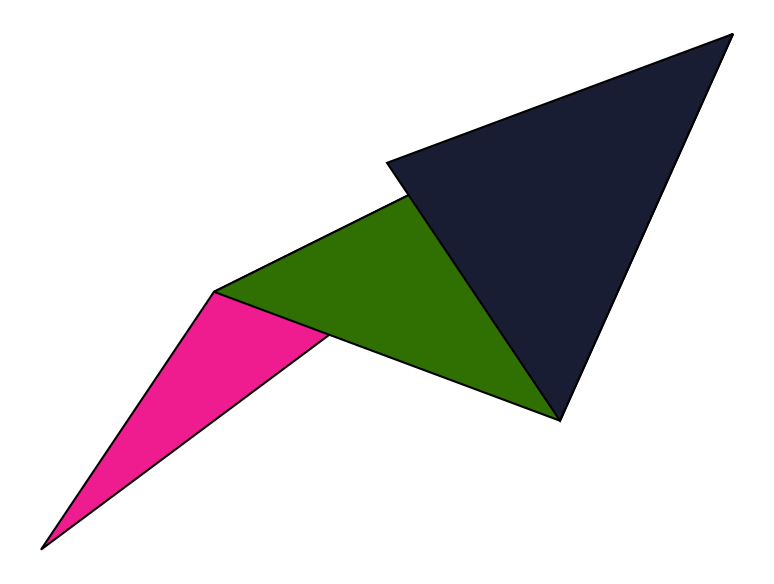

In [11]:
draw_polygon(points2)

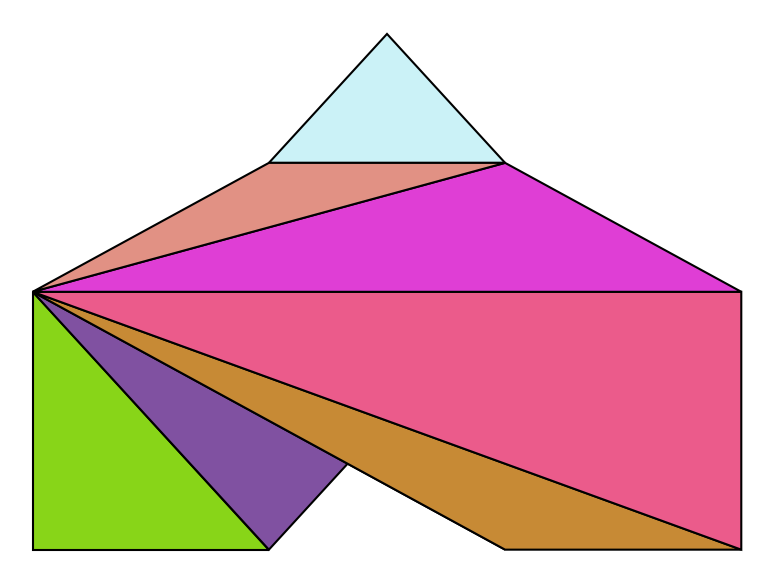

In [12]:
draw_polygon(points3)

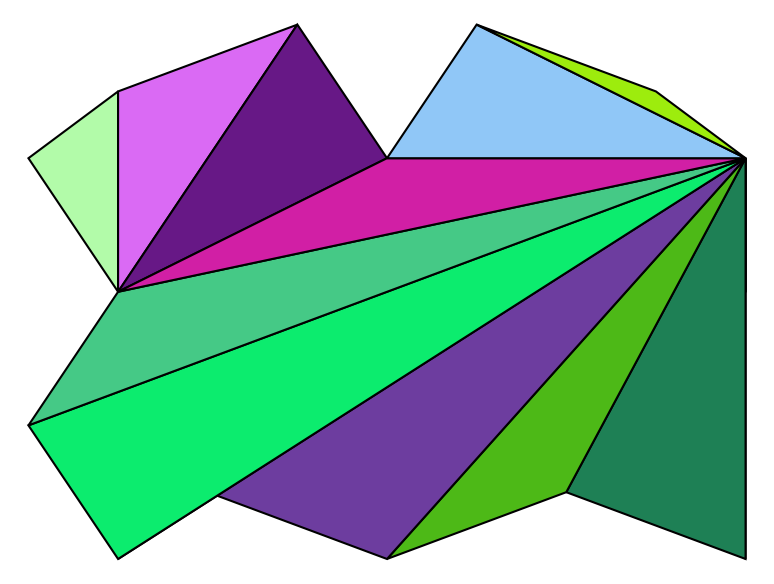

In [13]:
draw_polygon(points4)

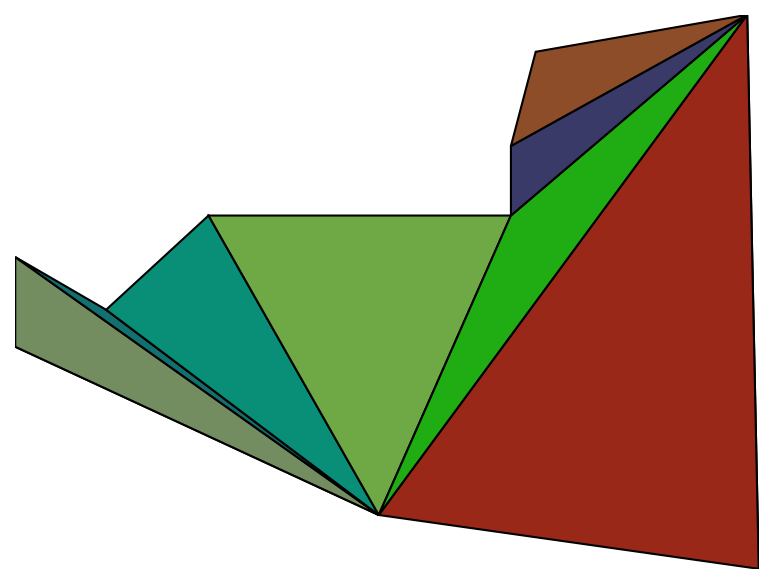

In [14]:
draw_polygon(points5)

# Polygon triangulation - animation

In [15]:
def draw_polygon(points, frames, color='blue', background_color='white', _random=False):
    if _random:
        random.shuffle(points)
    x_coordinates = [point[0] for point in points]
    y_coordinates = [point[1] for point in points]

    triangles = ear_clip_triangulation(points)
    colors = prepare_colors_of_triangles(len(triangles))
    
    #ax = draw_skeleton_of_polygons(triangles, ax)
    for i in range(len(triangles[:frames])):            
        plt.gca().add_patch(Polygon(triangles[i], facecolor=colors[i], edgecolor='black'))

In [16]:
def draw_skeleton_of_polygons(triangles, ax):
    for triangle in triangles:  
        polygon = Polygon([(triangle[0][0], triangle[0][1]), 
                           (triangle[1][0], triangle[1][1]), 
                           (triangle[2][0], triangle[2][1])], 
                            fill=None)
    
        ax.add_patch(polygon)
        
    return ax

In [17]:
def prepare_colors_of_triangles(i):
    colors = [[random.random() for _ in range(3)] for __ in range(i)]
 
    return colors

In [19]:
def update(n):
    points = [(random.random(), random.random()) for _ in range(10)]
    draw_polygon(points, n)

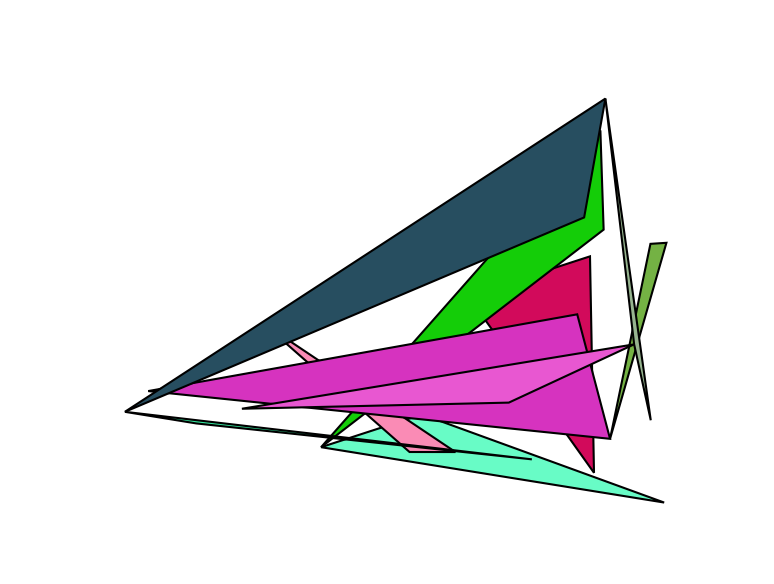

In [20]:
fig = plt.figure()
plt.xlim(0-0.15, 1+0.15)
plt.ylim(0-0.15, 1+0.15)
plt.axis('off')
matplotlib.animation.FuncAnimation(fig, update, frames=5)